In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, accuracy_score,precision_score,recall_score,f1_score,roc_curve,auc

In [ ]:
heart_disease_dataset = pd.read_csv('/content/heart_disease_data.csv')  # heart_disease_dataset

In [ ]:
heart_disease_dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
heart_disease_dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_disease_dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart_disease_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart_disease_dataset.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# checking the distribution of the target variable ki data imbalancing to nahi hai
heart_disease_dataset['target'].value_counts()

,count
target,
1,165
0,138


<Axes: ylabel='count'>

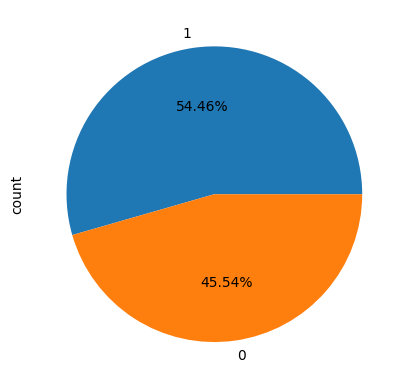

In [ ]:
# finding percentage of each class
# draw pie plot
heart_disease_dataset['target'].value_counts().plot(kind='pie',autopct='%1.2f%%')

In [ ]:
# splitting seprate feature
X = heart_disease_dataset.drop(columns='target', axis=1)
Y = heart_disease_dataset['target']

In [ ]:
# splitting the dataset into training data and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


In [ ]:
linear_model = LogisticRegression()

In [ ]:
# trin logistic regression
linear_model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

**model performance evaluation on training data**

In [ ]:
#  model prediction on training data
X_train_prediction = linear_model.predict(X_train)


In [ ]:
# now calculate Accuracy score on training data
training_data_accuracy = accuracy_score( Y_train,X_train_prediction)
training_data_precision = precision_score(Y_train,X_train_prediction)
training_data_recall = recall_score(Y_train,X_train_prediction)
training_data_f1 = f1_score(Y_train,X_train_prediction)
print('Accuracy on Training data : ', training_data_accuracy)
print('Precision on Training data : ', training_data_precision)
print('Recall on Training data : ', training_data_recall)
print('F1 Score on Training data : ', training_data_f1)

Accuracy on Training data :  0.8512396694214877
Precision on Training data :  0.8287671232876712
Recall on Training data :  0.9166666666666666
F1 Score on Training data :  0.8705035971223022


In [ ]:
#  creating a confusing matrix
cm = confusion_matrix(Y_train,X_train_prediction)
cm

array([[ 85,  25],
       [ 11, 121]])

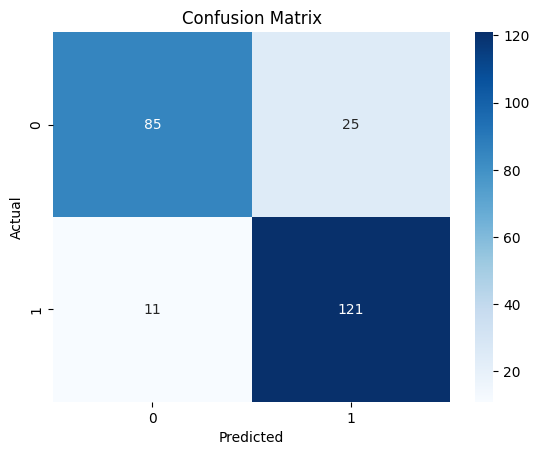

In [ ]:
# confusion matrix. Confusion matrix shows true and false prediction in a dataset
cm = confusion_matrix(Y_train,X_train_prediction)
sns.heatmap(cm, annot=True, fmt='d',cmap = "Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**model evaluation on test data**

In [ ]:
# model evaluation on the test data

# model evaluation on the test data

X_test_prediction = linear_model.predict(X_test)
# Use X_test_prediction instead of X_train_prediction for test data evaluation
test_data_accuracy = round(accuracy_score(Y_test, X_test_prediction), 2)
test_data_precision = round(precision_score(Y_test, X_test_prediction), 2)
test_data_recall = round(recall_score(Y_test, X_test_prediction), 2)
test_data_f1 = round(f1_score(Y_test, X_test_prediction), 2)
#print accuracy,precision,recall,f1 score on test data
print('Accuracy on Test data : ', test_data_accuracy)
print('Precision on Test data : ', test_data_precision)
print('Recall on Test data : ', test_data_recall)
print('F1 Score on Test data : ', test_data_f1)

Accuracy on Test data :  0.82
Precision on Test data :  0.84
Recall on Test data :  0.82
F1 Score on Test data :  0.83


In [ ]:
from sklearn.metrics import classification_report
# Generate and print classifiction report
report = classification_report(X_test_prediction, Y_test) # Assign the result of classification_report to the variable 'report'
print(report)

              precision    recall  f1-score   support

           0       0.82      0.79      0.81        29
           1       0.82      0.84      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [ ]:
#  creating a confusing matrix
cm = confusion_matrix(Y_test,X_test_prediction)
cm

array([[23,  5],
       [ 6, 27]])

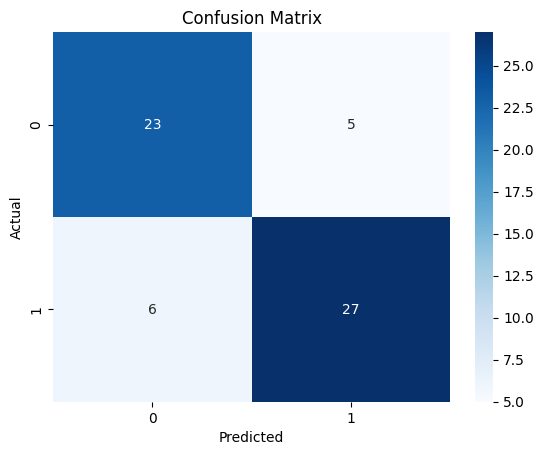

In [ ]:
# confusion matrix. Confusion matrix shows true and false prediction in a dataset
cm = confusion_matrix(Y_test,X_test_prediction)
sns.heatmap(cm, annot=True, fmt='d',cmap = "Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

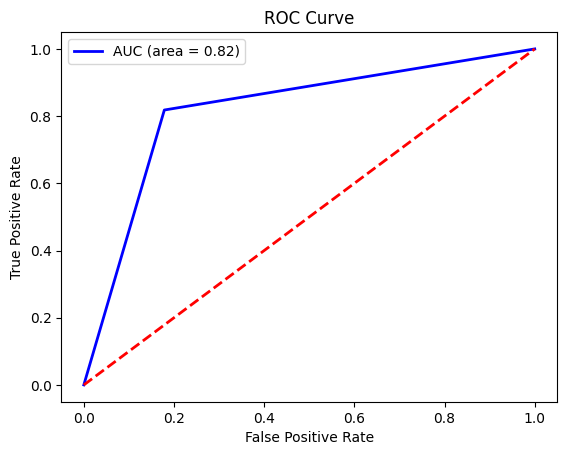

In [ ]:
# AUC-ROC Curve these evaluates how well the model distinguishes positive vs negative
# Higher AUC means a better model
# compute ROC curve
fpr,tpr,_ = roc_curve(Y_test,X_test_prediction)
# plot AUC_ROC curve
roc_auc = auc(fpr,tpr)
plt.figure()
plt.plot(fpr,tpr,color = "blue",lw=2,label='AUC (area = %0.2f)' % roc_auc)
plt.plot([0,1],[0,1],color='red',lw=2,linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="upper left")
plt.show()


In [ ]:
input_data = (63,0,10,140,268,0,70,16,0,3.6,4.8,2,2)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = linear_model.predict(input_data_reshaped)
print(prediction)
if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[1]
The Person has Heart Disease


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
